In [1]:
%pylab inline
import pynbody
import sphviewer as sph
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sphviewer.tools import QuickView

Populating the interactive namespace from numpy and matplotlib


In [2]:
path0='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path0+'snapshot_050')

In [3]:
s0.families()

[<Family gas>, <Family dm>, <Family star>]

In [4]:
td0 = s0.star
pos = td0['pos']
m = td0['mass']

In [5]:
pos = pos[:17445934,:]
m   = m[:17445934]

In [6]:
cut, = np.where((pos[:,2]<252) & (pos[:,2]> 248))

In [7]:
cut2, = np.where((m < 10) & (m>1))
p2 = pos[cut2]
trv2, = np.where((p2[:,2]<253) & (p2[:,2]> 247))
#plt.plot(p2[trv2,0],p2[trv2,1],ls='none',marker='.',markersize=.1,color='green')

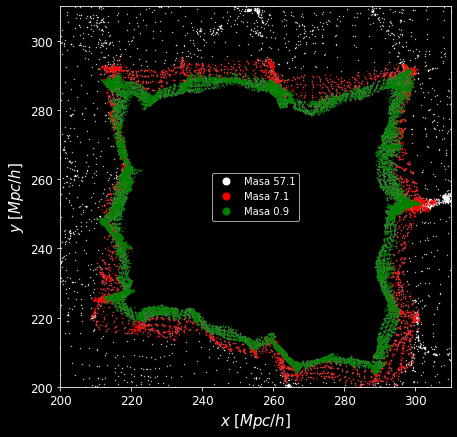

In [8]:
axis_font = {'fontname':'Arial', 'size':'20'}
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)
plt.style.use('dark_background')
plt.figure(1, figsize=(7,7))
cut1, = np.where((m < 10) & (m<1))
p1 = pos[cut1]
trv1, = np.where((p1[:,2]<253) & (p1[:,2]> 247))
plt.plot(pos[cut,0],pos[cut,1],ls='none',marker='.',markersize=.7,color='white',label='Masa 57.1')
plt.plot(p2[trv2,0],p2[trv2,1],ls='none',marker='.',markersize=.7,color='red',label='Masa 7.1')
plt.plot(p1[trv1,0],p1[trv1,1],ls='none',marker='.',markersize=.7,color='green',label='Masa 0.9')


plt.xlim(200,310)
plt.ylim(200,310)
plt.xlabel(r"$x \; [Mpc/h]$",size=15)
plt.ylabel(r"$y \; [Mpc/h]$",size=15)
plt.legend(markerscale=20)
plt.savefig(fname='/home/arodriguez/tesis/tidales.png',format='png')

In [9]:
td1 = s0.gas
pos = td1['pos']
m = td1['mass']

In [10]:
cut, = np.where((pos[:,2]>249.5) & (pos[:,2]< 249.7))

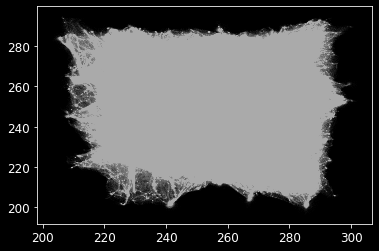

In [11]:
plt.plot(pos[:,0],pos[:,1],ls='none',marker='.',markersize=.01,color='white')

Text(0, 0.5, '$r [Mpc/h]$')

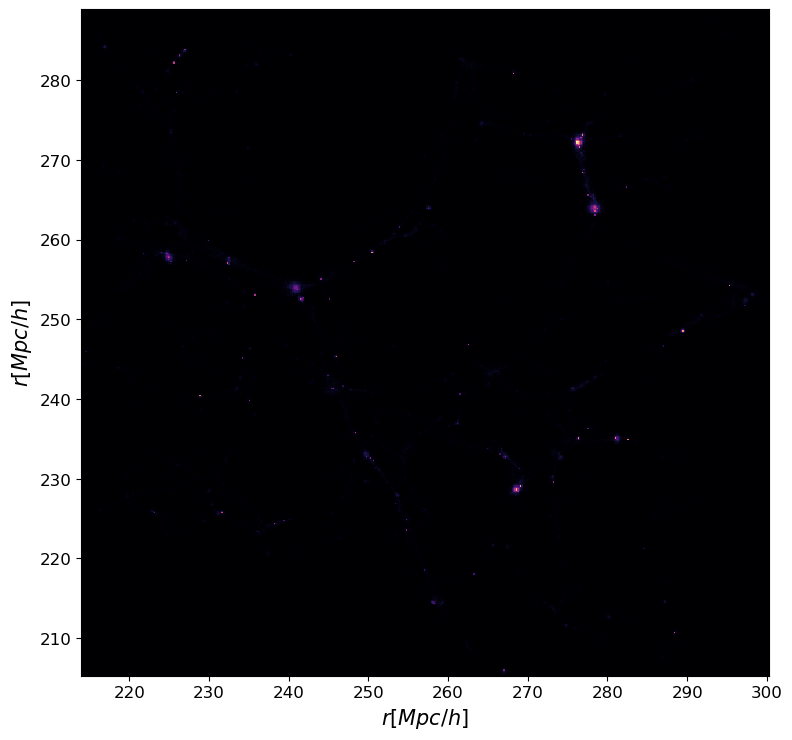

In [14]:
plt.style.use('default')
axis_font = {'fontname':'Arial', 'size':'20'}
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)


vmin=0
vmax=6
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='magma'
nb1 = 16 #suaviszado
npixel = 500 #numero de pixeles
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.06, left =0.11, right = 0.97, top = 0.97, wspace=0., hspace= 0)

particles=sph.Particles(pos[cut],m[cut],nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap) #, vmin=vmin, vmax= vmax)


circ = Circle((0,0),9.75,ls='-.',facecolor='None',edgecolor='yellow',linewidth=1.5)
#ax.add_patch(circ)

plt.xlabel(r"$r [Mpc/h]$",size=15)
plt.ylabel(r"$r [Mpc/h]$",size=15)

#plt.savefig(fname='/home/arodriguez/tesis/sph-viewer/portada.png',format='png')